**Pre process the data**

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plt

from sklearn.linear_model import  LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from joblib import dump
import missingno as mso

In [140]:
df=pd.read_csv("/content/kidney_disease.csv")

In [141]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [142]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

<Axes: >

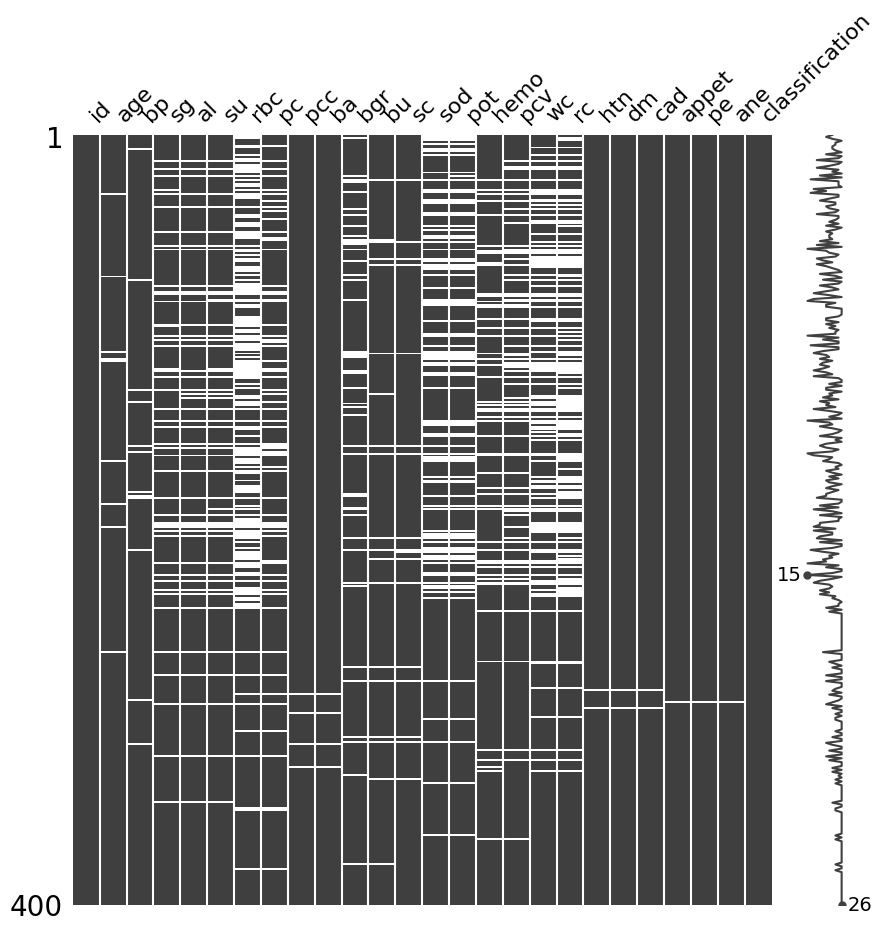

In [143]:
mso.matrix(df,figsize=(10,10))

In [144]:
# cause it has all unique value(no use foR ML models)
df=df.drop(columns="id",axis=1)

In [145]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [146]:
num_cols=["age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo"]
cat_cols=["htn","dm","cad","appet","pe","ane","rbc","pcc","ba","sg","pc","pcv","wc","rc"]


In [147]:
num_trans=Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("scaler",StandardScaler()),
])

cat_trans=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(drop="first",handle_unknown="ignore"))
])

processor=ColumnTransformer(transformers=[
    ("numerical",num_trans,num_cols),
    ("categorical",cat_trans,cat_cols)
])

model=Pipeline(steps=[
    ("preprocessed",processor),
    ("regressor",LogisticRegression())
])

In [148]:
model

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'hemo']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['htn', 'dm', 'cad', 'appet',
                                                   'pe', 'ane', 'rbc', 'pcc',
                                                   'ba', 'sg', 'pc', 'pcv',
                                                   'wc', 'rc'])])),
                ('regressor', LogisticRegression())])

In [149]:
# x input features and y output
x,y=df.drop("classification",axis=1),df["classification"]

In [150]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [151]:
print(xtrain,ytrain)
print(xtest,ytest)

      age     bp     sg   al   su       rbc        pc         pcc          ba  \
93   73.0  100.0  1.010  3.0  2.0  abnormal  abnormal     present  notpresent   
23   21.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent  notpresent   
299  73.0   60.0  1.020  0.0  0.0    normal    normal  notpresent  notpresent   
13   68.0   70.0    NaN  NaN  NaN       NaN       NaN  notpresent  notpresent   
90   63.0  100.0  1.010  2.0  2.0    normal    normal  notpresent     present   
..    ...    ...    ...  ...  ...       ...       ...         ...         ...   
255  34.0   80.0  1.025  0.0  0.0    normal    normal  notpresent  notpresent   
72   64.0   90.0  1.010  3.0  3.0       NaN  abnormal     present  notpresent   
396  42.0   70.0  1.025  0.0  0.0    normal    normal  notpresent  notpresent   
235  45.0   70.0  1.010  2.0  0.0       NaN    normal  notpresent  notpresent   
37   72.0   80.0    NaN  NaN  NaN       NaN       NaN  notpresent  notpresent   

       bgr  ...  hemo  pcv 

In [152]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'hemo']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['htn', 'dm', 'cad', 'appet',
                                                   'pe', 'ane', 'rbc', 'pcc',
                                                   'ba', 'sg', 'pc', 'pcv',
                                                   'wc', 'rc'])])),
                ('regressor', LogisticRegression())])

In [153]:
ypred=model.predict(xtest)
cm=m.confusion_matrix(ytest,ypred)
report=m.classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        47
      notckd       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros



In [154]:
dump(model,"kidney.jb")

['kidney.jb']